In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 200

In [3]:
dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
#Finding the number of duplicate IDs

idsUnique = len(set(dataset.User_ID)) #set has no duplicate elements
idsTotal = dataset.shape[0] #shape[0] gives the rows
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries


Text(0.5, 1.0, 'Purchase amount Distribution')

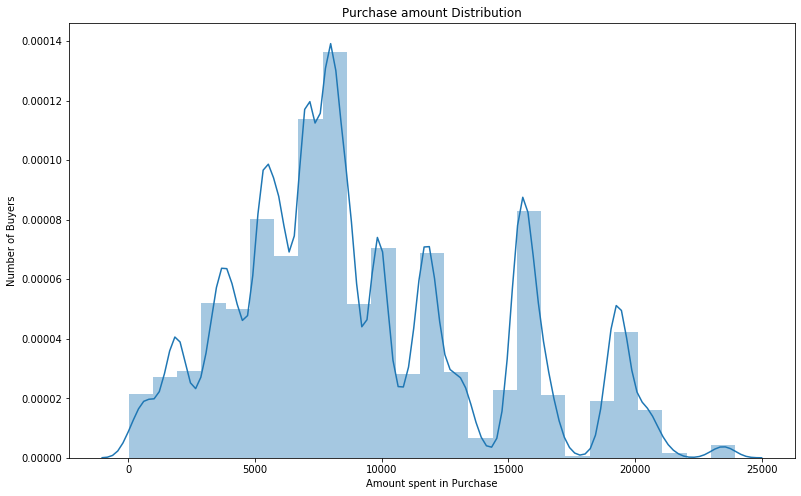

In [7]:
plt.figure(figsize=(13,8))
sns.distplot(dataset.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [8]:
print ("Skew is:", dataset.Purchase.skew())
print("Kurtosis: %f" % dataset.Purchase.kurt())

Skew is: 0.6001400037087128
Kurtosis: -0.338378


In [9]:
#To check which rows are numbers
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

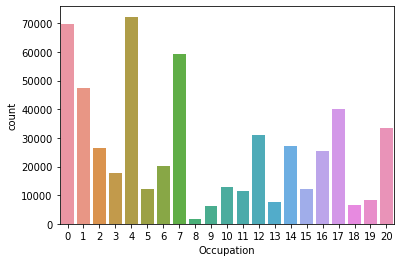

In [10]:
sns.countplot(dataset.Occupation)

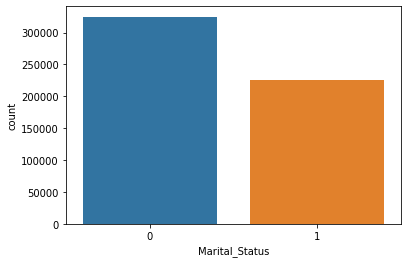

In [11]:
sns.countplot(dataset.Marital_Status)

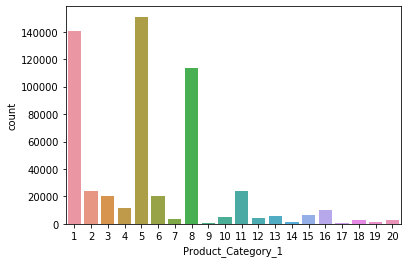

In [12]:
sns.countplot(dataset.Product_Category_1)  #Clothes

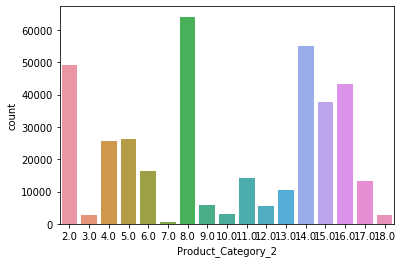

In [13]:
sns.countplot(dataset.Product_Category_2) #Electronics

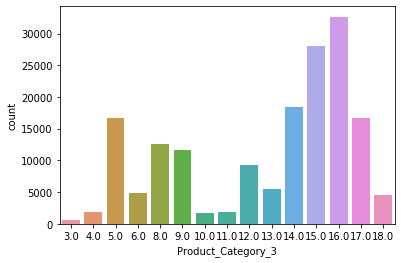

In [14]:
sns.countplot(dataset.Product_Category_3) #Home Goods

In [15]:
#To find the dependencies of Purchase on various attributes
corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10],"\n")
#Finding correlation of purchase with other attributes

Purchase              1.000000
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 



# Analysis of Columns with high correlation

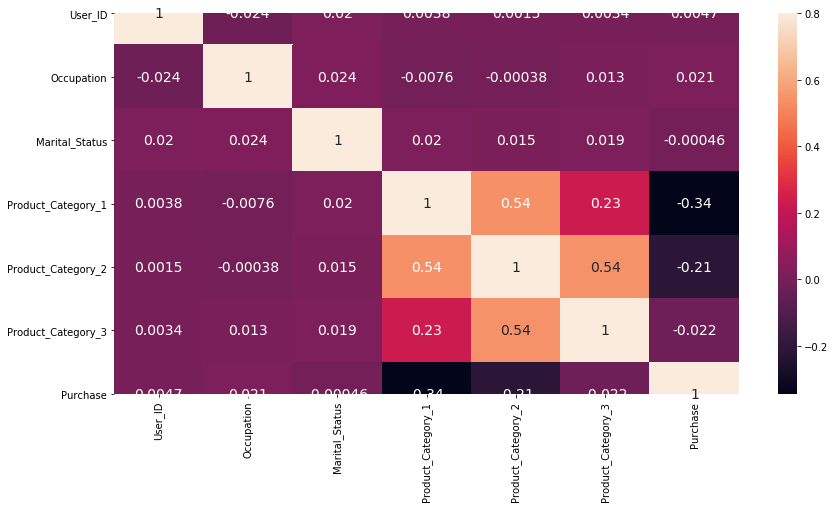

In [16]:
#correlation matrix
f, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 14}, annot=True);

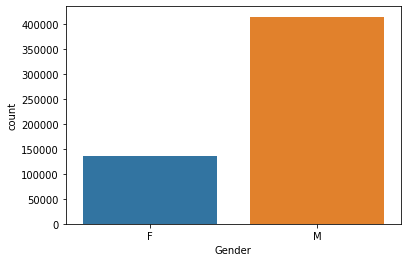

In [17]:
sns.countplot(dataset.Gender)

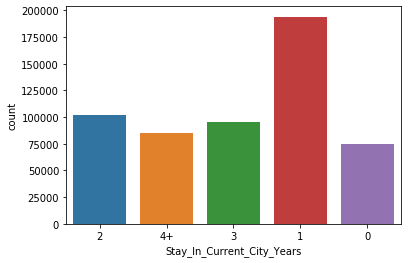

In [18]:
sns.countplot(dataset.Stay_In_Current_City_Years)

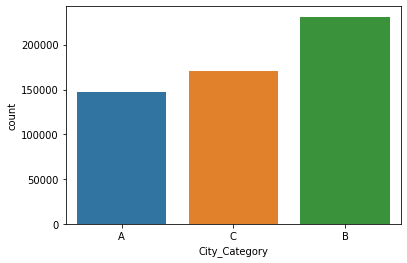

In [19]:
sns.countplot(dataset.City_Category)

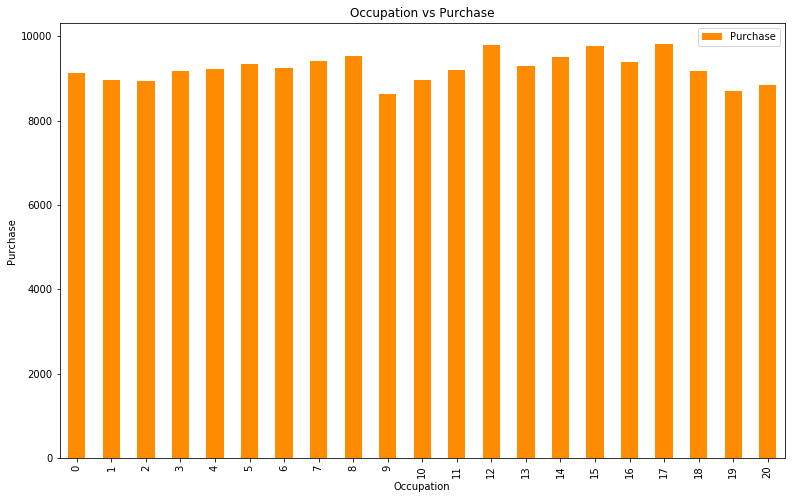

In [20]:
Occupation_pivot = \
dataset.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='darkorange',figsize=(13,8))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation vs Purchase")
plt.show()

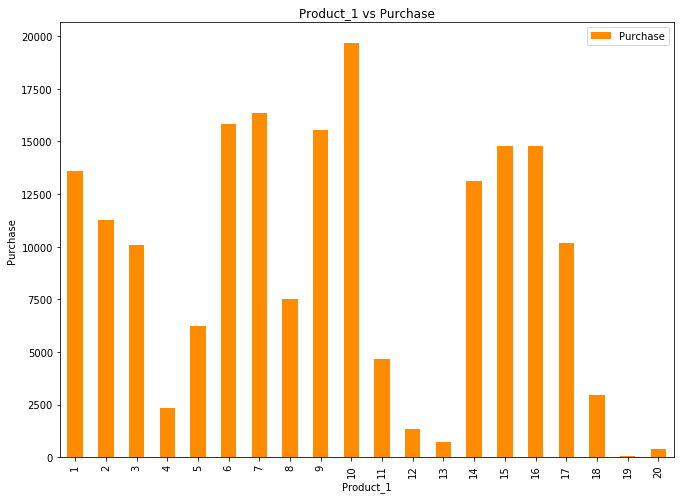

In [21]:
Product_Category_1_pivot=\
dataset.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)

Product_Category_1_pivot.plot(kind='bar', color='darkorange',figsize=(11,8))
plt.xlabel("Product_1")
plt.ylabel("Purchase")
plt.title("Product_1 vs Purchase")
plt.show()

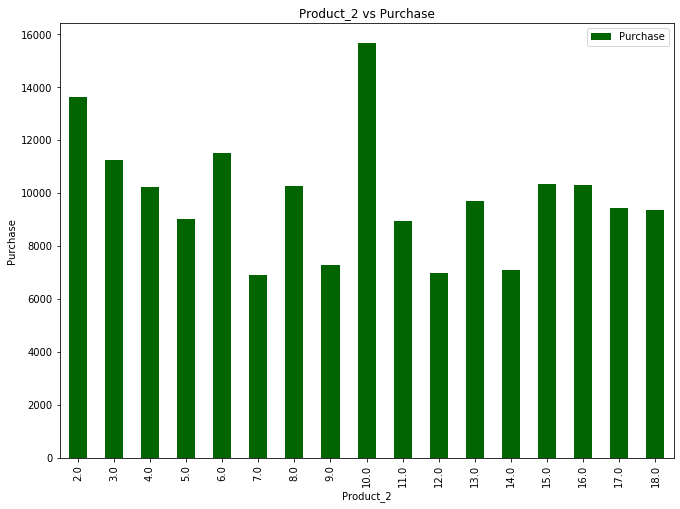

In [22]:
Product_Category_2_pivot=\
dataset.pivot_table(index='Product_Category_2', values="Purchase")

Product_Category_2_pivot.plot(kind='bar', color='darkgreen',figsize=(11,8))
plt.xlabel("Product_2")
plt.ylabel("Purchase")
plt.title("Product_2 vs Purchase")
plt.show()

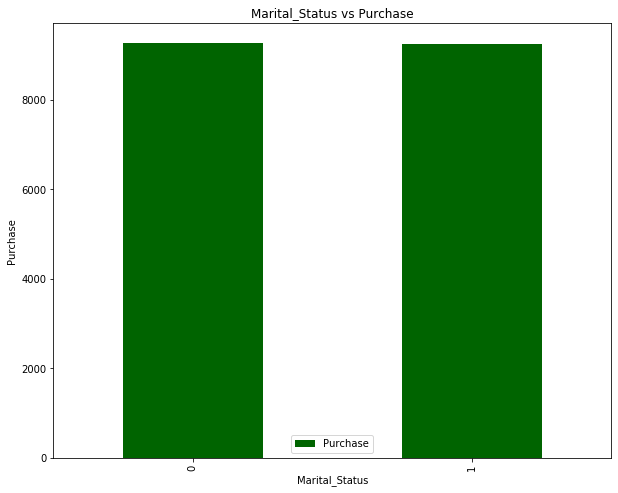

In [23]:
Occupation1 = \
dataset.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Occupation1.plot(kind='bar', color='darkgreen',figsize=(10,8))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status vs Purchase")
plt.show()

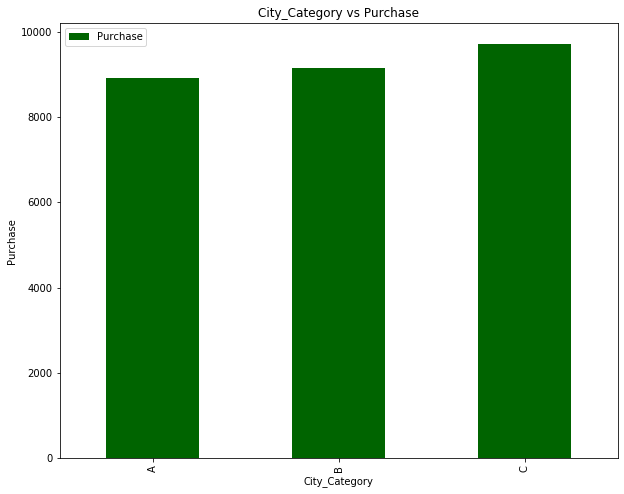

In [24]:
City1 = \
dataset.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

City1.plot(kind='bar', color='darkgreen',figsize=(10,8))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category vs Purchase")
plt.show()

### Data Cleaning

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [26]:
dataset['User_ID'] = dataset['User_ID'] - 1000000
test['User_ID'] = test['User_ID'] - 1000000

enc = LabelEncoder()
dataset['User_ID'] = enc.fit_transform(dataset['User_ID'])
test['User_ID'] = enc.transform(test['User_ID'])

In [27]:
dataset['Product_ID'] = dataset['Product_ID'].str.replace('P00', '')
test['Product_ID'] = test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
dataset['Product_ID'] = scaler.fit_transform(dataset['Product_ID'].values.reshape(-1, 1))
test['Product_ID'] = scaler.transform(test['Product_ID'].values.reshape(-1, 1))

In [28]:
#Concatenating sets of train and test
dataset['source']='train'
test['source']='test'

data = pd.concat([dataset,test], ignore_index = True, sort = False)

print(dataset.shape, test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [29]:
data.isnull().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                      29.808452
source                         0.000000
dtype: float64

In [30]:
data["Product_Category_2"]=\
data["Product_Category_2"].fillna(-1.0).astype("float")
data.Product_Category_2.value_counts().sort_index()

-1.0     245982
 2.0      70498
 3.0       4123
 4.0      36705
 5.0      37165
 6.0      23575
 7.0        854
 8.0      91317
 9.0       8177
 10.0      4420
 11.0     20230
 12.0      7801
 13.0     15054
 14.0     78834
 15.0     54114
 16.0     61687
 17.0     19104
 18.0      4027
Name: Product_Category_2, dtype: int64

In [31]:
data["Product_Category_3"]=\
data["Product_Category_3"].fillna(-1.0).astype("float")

In [32]:
data.Product_Category_3.value_counts().sort_index()

-1.0     545809
 3.0        878
 4.0       2691
 5.0      23799
 6.0       6888
 8.0      17861
 9.0      16532
 10.0      2501
 11.0      2585
 12.0     13115
 13.0      7849
 14.0     26283
 15.0     39968
 16.0     46469
 17.0     23818
 18.0      6621
Name: Product_Category_3, dtype: int64

In [33]:
extra = data.index[(data.Product_Category_1.isin([19,20])) & (data.source == "dataset")]
data = data.drop(extra)

In [34]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

In [35]:
category_cols = data.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
 #Number of times each value appears in the column
 frequency = data[col].value_counts()
 print("\nThis is the frequency distribution for " + col + ":")
 print(frequency)


This is the frequency distribution for Gender:
M    590031
F    193636
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

This is the frequency distribution for City_Category:
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


In [36]:
data['Gender'],ages = pd.factorize(data['Gender'])
print(ages)
print(data['Gender'].unique())
data["Gender"].value_counts()

Index(['F', 'M'], dtype='object')
[0 1]


1    590031
0    193636
Name: Gender, dtype: int64

In [37]:
data['Age'],ages = pd.factorize(data['Age'])
print(ages)
print(data['Age'].unique())
data["Age"].value_counts()

Index(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype='object')
[0 1 2 3 4 5 6]


2    313015
5    156724
6    141953
3     65278
4     54784
1     30579
0     21334
Name: Age, dtype: int64

In [38]:
data['Stay_In_Current_City_Years'],scc = pd.factorize(data['Stay_In_Current_City_Years'])
print(scc)
print(data['Stay_In_Current_City_Years'].unique())
data['Stay_In_Current_City_Years'].value_counts()

Index(['2', '4+', '3', '1', '0'], dtype='object')
[0 1 2 3 4]


3    276425
0    145427
2    135428
1    120671
4    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [39]:
data['City_Category'],cc = pd.factorize(data['City_Category'])
print(cc)
print(data['City_Category'].unique())
data['City_Category'].value_counts()

Index(['A', 'C', 'B'], dtype='object')
[0 1 2]


2    329739
1    243684
0    210244
Name: City_Category, dtype: int64

In [40]:
cat_col = ['Gender', 'City_Category']
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [41]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,0,10,0,0,0,3,-1.0,-1.0,8370.0,train
1,0,0.722139,0,0,10,0,0,0,1,6.0,14.0,15200.0,train
2,0,-0.845799,0,0,10,0,0,0,12,-1.0,-1.0,1422.0,train
3,0,-0.869157,0,0,10,0,0,0,12,14.0,-1.0,1057.0,train
4,1,1.077382,1,1,16,1,1,0,8,-1.0,-1.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,5886,-0.543112,0,2,15,2,1,1,8,-1.0,-1.0,NaN,test
783663,5886,0.777615,0,2,15,2,1,1,5,8.0,-1.0,NaN,test
783664,5886,-1.390830,0,2,15,2,1,1,1,5.0,12.0,NaN,test
783665,5887,-0.486662,0,3,1,1,1,0,10,16.0,-1.0,NaN,test


In [42]:
encoder = LabelEncoder()
data1=data.copy()

In [43]:
for col in cat_col:
    data1[col] = encoder.fit_transform(data1[col])

In [44]:
scaler = StandardScaler()

for col in num_col:
    data1[col] = scaler.fit(data1[col].values.reshape(-1, 1))

In [45]:
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",8370.0,train
1,0,0.722139,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",15200.0,train
2,0,-0.845799,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1422.0,train
3,0,-0.869157,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1057.0,train
4,1,1.077382,1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,5886,-0.543112,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",NaN,test
783663,5886,0.777615,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",NaN,test
783664,5886,-1.390830,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",2,"StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",NaN,test
783665,5887,-0.486662,0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",1,"StandardScaler(copy=True, with_mean=True, with...",0,"StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...",NaN,test


### Count Functions

In [46]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
    count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [119]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [120]:
# #Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [121]:
product_id_res = data.groupby(["Product_ID"])["Purchase"].mean()
avg_cost = data["Purchase"].mean()
# If i find a product id for which i dont have an avg pricing i will use global vg pricing.
product_id_res_map = {}
# created a map with product id to avg price map
val = product_id_res.iteritems()
for key, value in val:
    p_id = str(key)
    product_id_res_map[p_id] = value

In [122]:
def get_purchase_mean(product_id, product_category=None, key=None):
    key_pair = str(product_id)
    key_pair_pid = str(product_id) + str(product_category)
    if key == "1":
        if key_pair_pid in product_category_1_res:
            return product_category_1_res[key_pair_pid]
    elif key == "2":
        if key_pair_pid in product_category_2_res:
            return product_category_2_res[key_pair_pid]
    elif key == "3":
        if key_pair_pid in product_category_3_res:
            return product_category_3_res[key_pair_pid]
    if key_pair in product_id:
         return product_id[key_pair]
    return avg_cost

In [123]:
get_purchase_mean(data.Product_ID)

9263.968712959126

### Finding models to predict purchase 

In [124]:
train_df = pd.read_csv("train_modified.csv")
test_df = pd.read_csv("test_modified.csv")

In [125]:
# #Define target and ID columns:
# target = 'Item_Outlet_Sales'
# IDcol = ['Item_Identifier','Outlet_Identifier']

#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [126]:
def commonfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fitting the algorithm
    alg.fit(dtrain[predictors], dtrain[target])
        
    dtrain_predictions = alg.predict(dtrain[predictors])

    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("\nModel Report")
    #The value to check is RMSE(parameter)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    dtest[target] = alg.predict(dtest[predictors])
    
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 4632
CV Score : Mean - 4635 | Std - 35.02 | Min - 4545 | Max - 4688


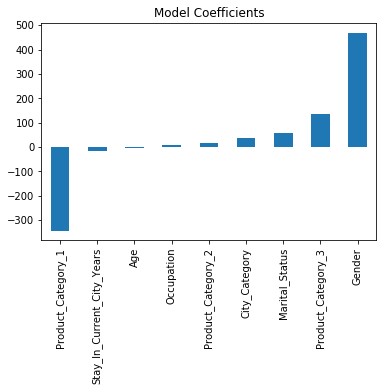

In [127]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID'])
commonfit(LR, train_df, test_df, predictors, target, IDcol, 'LR1.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [128]:
from sklearn.linear_model import Ridge
RR1 = Ridge(alpha=0.05,normalize=True)
commonfit(RR1, train_df, test_df, predictors, target, IDcol, 'RR.csv')#RR stands for Ridge Regression


Model Report
RMSE : 4633
CV Score : Mean - 4636 | Std - 31.86 | Min - 4570 | Max - 4687


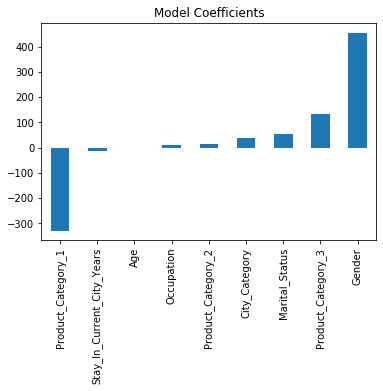

In [129]:
coef1 = pd.Series(RR1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [130]:
from sklearn.linear_model import Ridge
RR1 = Ridge(alpha=3,normalize=True)
commonfit(RR1, train_df, test_df, predictors, target, IDcol, 'RR1.csv')


Model Report
RMSE : 4817
CV Score : Mean - 4818 | Std - 112.1 | Min - 4741 | Max - 5293


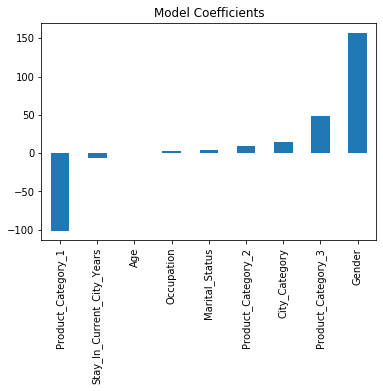

In [131]:
coef1 = pd.Series(RR1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [132]:
from sklearn.linear_model import Ridge
RR3 = Ridge(alpha=5,normalize=True)
commonfit(RR3, train_df, test_df, predictors, target, IDcol, 'RR3.csv')


Model Report
RMSE : 4874
CV Score : Mean - 4873 | Std - 132.8 | Min - 4791 | Max - 5441


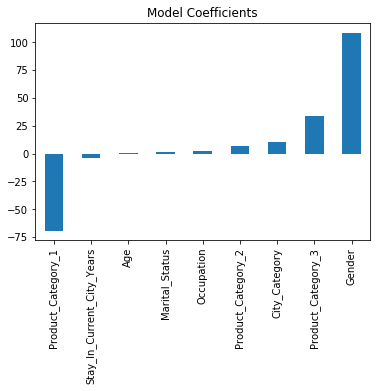

In [133]:
coef1 = pd.Series(RR3.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [134]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=200)
commonfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv') #Decision Tree Regression
importances = DT.feature_importances_


Model Report
RMSE : 2916
CV Score : Mean - 2947 | Std - 19.9 | Min - 2907 | Max - 2977


In [135]:
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.960362)
2. feature 7 (0.015381)
3. feature 8 (0.010716)
4. feature 3 (0.004482)
5. feature 2 (0.003268)
6. feature 1 (0.002386)
7. feature 4 (0.001721)
8. feature 0 (0.000868)
9. feature 5 (0.000815)


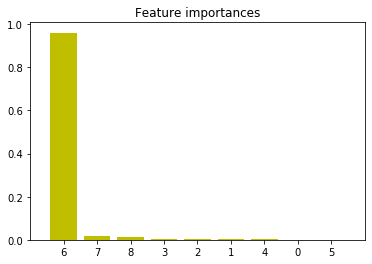

In [136]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [137]:
RF = DecisionTreeRegressor(max_depth=9, min_samples_leaf=100)
commonfit(RF, train_df, test_df, predictors, target, IDcol,'RF.csv')


Model Report
RMSE : 2956
CV Score : Mean - 2973 | Std - 20.58 | Min - 2936 | Max - 3008


In [138]:
importances = RF.feature_importances_

In [139]:
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 6 (0.973933)
2. feature 7 (0.011341)
3. feature 8 (0.008783)
4. feature 3 (0.003923)
5. feature 2 (0.000629)
6. feature 1 (0.000587)
7. feature 0 (0.000399)
8. feature 4 (0.000247)
9. feature 5 (0.000158)


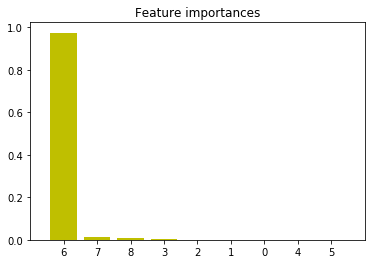

In [140]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### XBoost  

In [141]:
import sys
!{sys.executable} -m pip install xgboost

In [142]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5, eval_set=[(test_df[predictors], test_df[target])], verbose=False)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [143]:
train_df_predictions = my_model.predict(train_df[predictors])

predictions = my_model.predict(test_df[predictors])

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))

IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("XGBoost.csv", index=False)

Mean Absolute Error : 240.82192676282142
RMSE : 2926


In [144]:
importances = my_model.feature_importances_

In [146]:
indices = np.argsort(importances)[::-1]
print("Feature order:")
for f in range(train_df[predictors].shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature order:
1. feature 6 (0.948004)
2. feature 8 (0.014795)
3. feature 7 (0.011929)
4. feature 3 (0.010370)
5. feature 4 (0.003400)
6. feature 2 (0.003174)
7. feature 1 (0.003119)
8. feature 5 (0.002954)
9. feature 0 (0.002256)


### More evenly distributed model 

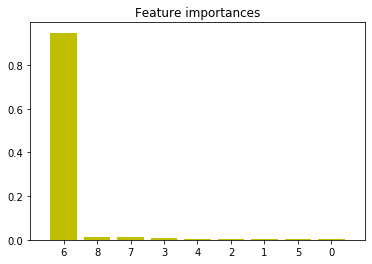

In [147]:
X=train_df[predictors]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="y", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Hyperparameter Tuning

## Exhaustive - Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

RF11=RandomForestRegressor(n_estimators=10, max_depth=3)
RF21=RandomForestRegressor(n_estimators=10, max_depth=10)
RF31=RandomForestRegressor(n_estimators=10, max_depth=20)
RF41=RandomForestRegressor(n_estimators=10, max_depth=40)

In [149]:
RF5=RandomForestRegressor(n_estimators=50, max_depth=3)
# RF6=RandomForestClassifier(n_estimators=50, max_depth=10)
# RF7=RandomForestClassifier(n_estimators=50, max_depth=20)
# RF8=RandomForestClassifier(n_estimators=50, max_depth=40)

In [150]:
RF9=RandomForestRegressor(n_estimators=100, max_depth=3)
# RF10=RandomForestClassifier(n_estimators=100, max_depth=10)
# RF11=RandomForestClassifier(n_estimators=100, max_depth=20)
# RF12=RandomForestClassifier(n_estimators=100, max_depth=40)

In [151]:
RF13=RandomForestRegressor(n_estimators=200, max_depth=3)
# RF14=RandomForestClassifier(n_estimators=200, max_depth=10)
# RF15=RandomForestClassifier(n_estimators=200, max_depth=20)
# RF16=RandomForestClassifier(n_estimators=200, max_depth=40)

In [154]:
RF11

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Association Rule Mining

In [155]:
import sys
!{sys.executable} -m pip install mlxtend

In [156]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [157]:
basket = train_df[(train_df['Product_Category_1'] == 4)]
basket

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
15,5,0.150829,0,4,9,0,3,0,4,5.0,-1.0,2079.0
72,17,-0.222906,0,6,3,2,2,0,4,8.0,9.0,2802.0
80,17,-0.784483,0,6,3,2,2,0,4,5.0,-1.0,697.0
175,32,0.433078,1,3,3,0,3,1,4,5.0,-1.0,811.0
176,32,-1.142646,1,3,3,0,3,1,4,5.0,-1.0,2846.0
...,...,...,...,...,...,...,...,...,...,...,...,...
545752,5866,-0.762098,1,3,1,2,3,1,4,5.0,12.0,2134.0
545847,5885,-0.701755,0,2,1,1,2,0,4,8.0,9.0,2761.0
545880,5886,-1.451173,0,2,15,2,1,1,4,8.0,-1.0,2840.0
545888,5886,0.207279,0,2,15,2,1,1,4,9.0,15.0,2852.0


In [158]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

newtrain = train_df.applymap(encode_units)

In [159]:
newtrain

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0.0,0,0,1,0,0,0,1,0,0,1
1,0,NaN,0,0,1,0,0,0,1,1,1,1
2,0,0.0,0,0,1,0,0,0,1,0,0,1
3,0,0.0,0,0,1,0,0,0,1,1,0,1
4,1,1.0,1,1,1,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,1.0,1,1,1,1,1,1,1,0,0,1
550064,1,1.0,0,1,1,1,1,0,1,0,0,1
550065,1,1.0,0,1,1,1,1,1,1,0,0,1
550066,1,1.0,0,1,1,1,0,0,1,0,0,1


In [160]:
newtrain=newtrain.dropna()

In [161]:
predictors1 = train_df.columns.drop(['Product_ID','User_ID','Marital_Status','Stay_In_Current_City_Years'])

In [162]:
frequent_itemsets = apriori(newtrain[predictors1], min_support=0.07, use_colnames=True)

In [163]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Age),0.750480,0.972958,0.732390,0.975896,1.003020,0.002205,1.121888
1,(Age),(Gender),0.972958,0.750480,0.732390,0.752746,1.003020,0.002205,1.009165
2,(Gender),(Occupation),0.750480,0.873749,0.657868,0.876596,1.003259,0.002137,1.023072
3,(Occupation),(Gender),0.873749,0.750480,0.657868,0.752925,1.003259,0.002137,1.009898
4,(Product_Category_1),(Gender),1.000000,0.750480,0.750480,0.750480,1.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...
5181,(Gender),"(City_Category, Age, Product_Category_3, Produ...",0.750480,0.202000,0.155851,0.207669,1.028062,0.004254,1.007154
5182,(Product_Category_2),"(City_Category, Age, Product_Category_3, Gende...",0.690115,0.155851,0.155851,0.225833,1.449034,0.048296,1.090397
5183,(Product_Category_1),"(City_Category, Age, Product_Category_3, Gende...",1.000000,0.155851,0.155851,0.155851,1.000000,0.000000,1.000000
5184,(Purchase),"(City_Category, Age, Product_Category_3, Gende...",1.000000,0.155851,0.155851,0.155851,1.000000,0.000000,1.000000


In [164]:
rules[ (rules['lift'] > 1.0) &
       (rules['confidence'] > 0.73)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gender),(Age),0.750480,0.972958,0.732390,0.975896,1.003020,0.002205,1.121888
1,(Age),(Gender),0.972958,0.750480,0.732390,0.752746,1.003020,0.002205,1.009165
2,(Gender),(Occupation),0.750480,0.873749,0.657868,0.876596,1.003259,0.002137,1.023072
3,(Occupation),(Gender),0.873749,0.750480,0.657868,0.752925,1.003259,0.002137,1.009898
7,(Product_Category_2),(Gender),0.690115,0.750480,0.521091,0.755078,1.006128,0.003174,1.018776
...,...,...,...,...,...,...,...,...,...
5055,"(Product_Category_1, City_Category, Product_Ca...","(Gender, Purchase, Age, Product_Category_2)",0.208556,0.508186,0.155851,0.747285,1.470496,0.049866,1.946124
5056,"(Purchase, City_Category, Product_Category_3, ...","(Product_Category_1, Gender, Age, Product_Cate...",0.208556,0.508186,0.155851,0.747285,1.470496,0.049866,1.946124
5070,"(Gender, Age, Product_Category_3, Occupation)","(Product_Category_1, Purchase, City_Category, ...",0.208867,0.510623,0.155851,0.746172,1.461298,0.049199,1.927987
5107,"(Gender, City_Category, Product_Category_3)","(Age, Product_Category_2, Product_Category_1, ...",0.183794,0.587093,0.155851,0.847966,1.444347,0.047947,2.715883


In [165]:
newtrain1 = basket.applymap(encode_units)
newtrain1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
15,1,NaN,0,1,1,0,1,0,1,1,0,1
72,1,0.0,0,1,1,1,1,0,1,1,1,1
80,1,0.0,0,1,1,1,1,0,1,1,0,1
175,1,NaN,1,1,1,0,1,1,1,1,0,1
176,1,0.0,1,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
545752,1,0.0,1,1,1,1,1,1,1,1,1,1
545847,1,0.0,0,1,1,1,1,0,1,1,1,1
545880,1,0.0,0,1,1,1,1,1,1,1,0,1
545888,1,NaN,0,1,1,1,1,1,1,1,1,1


In [166]:
frequent_itemsets = apriori(newtrain1[predictors1], min_support=0.07, use_colnames=True)

In [167]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [168]:
rules[ (rules['lift'] > 1.02) &
       (rules['confidence'] > 0.966)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
65,"(Gender, Product_Category_3)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
324,"(Gender, Product_Category_3, Occupation)",(Age),0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119
405,"(Product_Category_1, Gender, Product_Category_3)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
412,"(Gender, Product_Category_3)","(Product_Category_1, Age)",0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
433,"(Product_Category_2, Gender, Product_Category_3)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
436,"(Gender, Product_Category_3)","(Age, Product_Category_2)",0.323832,0.924615,0.312941,0.966369,1.045158,0.013521,2.241526
461,"(Gender, Purchase, Product_Category_3)",(Age),0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
466,"(Gender, Product_Category_3)","(Age, Purchase)",0.323832,0.935506,0.312941,0.966369,1.032991,0.009994,1.917694
1142,"(Product_Category_1, Gender, Product_Category_...",(Age),0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119
1150,"(Gender, Product_Category_3, Occupation)","(Product_Category_1, Age)",0.285459,0.935506,0.276185,0.967511,1.034212,0.009136,1.985119


## Decision Tree

In [169]:
from sklearn import tree
import collections

In [170]:
import sys
!{sys.executable} -m pip install graphviz

In [172]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24573 sha256=e6c1c6f94576f74d3e5004de38a367347eb6929b647a4cd6b97f773fa9424ef9
  Stored in directory: C:\Users\vibsg\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [174]:
import pydotplus


In [175]:
X=train_df[predictors].loc[:2000,]
y=train_df[target].loc[:2000,]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X,y)
clf

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [176]:
import sys
!{sys.executable} -m  pip install git+git://github.com/christophM/rulefit.git

  Cloning git://github.com/christophM/rulefit.git to c:\users\vibsg\appdata\local\temp\pip-req-build-9nlh73nn
  Created wheel for RuleFit: filename=RuleFit-0.3-cp37-none-any.whl size=7831 sha256=418ca7687b09b068d37b767e90c7b32a77be240064d1134b2aaa1955fbca4ad6
  Stored in directory: C:\Users\vibsg\AppData\Local\Temp\pip-ephem-wheel-cache-aj9tpffc\wheels\0b\51\b8\9dc135361d610b383e5029f82ceb5b73eef717e0c1212c8cd1
Successfully built RuleFit


  Running command git clone -q git://github.com/christophM/rulefit.git 'C:\Users\vibsg\AppData\Local\Temp\pip-req-build-9nlh73nn'


In [177]:
import sys
!{sys.executable} -m  pip install graphviz

In [178]:
pd.DataFrame(clf.decision_path(X).toarray()).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [179]:
pd.concat([X.reset_index(drop=True),pd.DataFrame(clf.decision_path(X).toarray())],1).head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,...,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152
0,0,0,10,0,0,0,3,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,10,0,0,0,1,6.0,14.0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,10,0,0,0,12,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,10,0,0,0,12,14.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,16,1,1,0,8,-1.0,-1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
dTree3 = DecisionTreeRegressor(max_depth = 4)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(Xrules, y)


Model Report
RMSE : 3634
CV Score : Mean - 3642 | Std - 29.4 | Min - 3560 | Max - 3686


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [181]:
def find_node(tree_, current_node, search_node, features):
    
    child_left = tree_.children_left[current_node]
    child_right = tree_.children_right[current_node]

    split_feature = str(features[tree_.feature[current_node]])
    split_value = str(tree_.threshold[current_node])


    if child_left != -1:
        if child_left != search_node:
            left_one = find_node(tree_, child_left, search_node, features)
        else:
            return(str(split_feature)+" <= "+str(split_value))
    else:
        return ""

    if child_right != -1:
        if child_right != search_node:
            right_one = find_node(tree_, child_right, search_node, features)
        else:
            return(str(split_feature)+" > "+str(split_value))
    else:
        return ""


    if len(left_one)>0:
        return(str(split_feature)+" <= "+str(split_value)+", "+left_one)
    elif len(right_one)>0:
        return(str(split_feature)+" > "+str(split_value)+","+right_one)
    else:
        return ""

In [182]:
find_node(tree_ = clf.tree_, current_node = 0, search_node = 13, features = X.columns.tolist())

'Product_Category_1 <= 2.5, Product_Category_1 <= 1.5, Occupation <= 18.5, Product_Category_2 <= 16.5, Product_Category_3 <= 16.5, Product_Category_3 <= 8.5, Occupation <= 6.5, Occupation <= 3.5, Occupation <= 2.5, City_Category <= 0.5, Product_Category_3 <= 6.5, Occupation <= 0.5, Product_Category_2 <= 4.0'

In [194]:
k = pd.read_csv("train.csv")
k[(k['Purchase']>=10000)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
...,...,...,...,...,...,...,...,...,...,...,...,...
545892,1006037,P00148642,F,46-50,1,C,4+,0,6,10.0,13.0,11952
545896,1006037,P00183142,F,46-50,1,C,4+,0,15,NaN,NaN,13054
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [195]:
dfDecisionPath = pd.DataFrame(clf.decision_path(X).toarray())

In [196]:
dfDecisionPath.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079,3080,3081,3082,3083,3084,3085,3086,3087,3088,3089,3090,3091,3092,3093,3094,3095,3096,3097,3098,3099,3100,3101,3102,3103,3104,3105,3106,3107,3108,3109,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121,3122,3123,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147,3148,3149,3150,3151,3152
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [186]:
dTree3 = DecisionTreeRegressor(max_depth = 4)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(Xrules, y)


Model Report
RMSE : 3634
CV Score : Mean - 3642 | Std - 29.4 | Min - 3560 | Max - 3686


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
predictors3=['Product_Category_1','Product_Category_2','Product_Category_3']
store_data=train_df[predictors3]

In [188]:
store_data= store_data.applymap(encode_units)
store_data=store_data.dropna()

In [189]:
store_data

,Product_Category_1,Product_Category_2,Product_Category_3
0,1,0,0
1,1,1,1
2,1,0,0
3,1,1,0
4,1,0,0
...,...,...,...
550063,1,0,0
550064,1,0,0
550065,1,0,0
550066,1,0,0


In [190]:
frequent_itemsets = apriori(store_data, min_support=0.07, use_colnames=True)

In [191]:
frequent_itemsets

,support,itemsets
0,1.000000,(Product_Category_1)
1,0.684334,(Product_Category_2)
2,0.303273,(Product_Category_3)
3,0.684334,"(Product_Category_1, Product_Category_2)"
4,0.303273,"(Product_Category_1, Product_Category_3)"
5,0.303273,"(Product_Category_3, Product_Category_2)"
6,0.303273,"(Product_Category_1, Product_Category_3, Produ..."


In [192]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,0,-1.028774,0,0,10,0,0,0,3,-1.0,-1.0,8370.0,train
1,0,0.722139,0,0,10,0,0,0,1,6.0,14.0,15200.0,train
2,0,-0.845799,0,0,10,0,0,0,12,-1.0,-1.0,1422.0,train
3,0,-0.869157,0,0,10,0,0,0,12,14.0,-1.0,1057.0,train
4,1,1.077382,1,1,16,1,1,0,8,-1.0,-1.0,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,5886,-0.543112,0,2,15,2,1,1,8,-1.0,-1.0,NaN,test
783663,5886,0.777615,0,2,15,2,1,1,5,8.0,-1.0,NaN,test
783664,5886,-1.390830,0,2,15,2,1,1,1,5.0,12.0,NaN,test
783665,5887,-0.486662,0,3,1,1,1,0,10,16.0,-1.0,NaN,test


In [193]:
dTree3 = DecisionTreeRegressor(max_depth = 6)
commonfit(dTree3, train_df, test_df, predictors, target, IDcol, 'DT.csv')

Xrules = pd.concat([X.reset_index(drop=True),pd.DataFrame(dTree3.decision_path(X).toarray()).iloc[:,1:]],1)


from sklearn.linear_model import LinearRegression

tree_model = DecisionTreeRegressor()
tree_model.fit(Xrules, y)


Model Report
RMSE : 2996
CV Score : Mean - 3242 | Std - 54.63 | Min - 3031 | Max - 3289


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')